In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Importing the libraries

In [2]:
# import libraries

import pandas as pd #working with dataframes
%matplotlib inline
import matplotlib.pyplot as plt #plotting
import seaborn as sns #plotting
from sklearn.preprocessing import StandardScaler, RobustScaler #scale data
from sklearn.model_selection import train_test_split #for splitting data
from imblearn.under_sampling import RandomUnderSampler #for undersampling 
from imblearn.over_sampling import RandomOverSampler #for oversampling
from imblearn.over_sampling import SMOTE #for smote
from imblearn.under_sampling import NearMiss  #near miss undersampling
from sklearn import tree # for decision tree
#for roc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report # classification report: precision, recall
from sklearn.linear_model import LogisticRegression #linear regression
from sklearn.svm import SVC #svc
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.ensemble import RandomForestClassifier #random forest
import xgboost as xgb #XGBoost

Using TensorFlow backend.


# Data Exploration

## Load the data

In [3]:
#load the data
dt=pd.read_csv("../input/creditcardfraud/creditcard.csv")
dt.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Check Summary of data

In [4]:
#to check for basic summary of the data
dt.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,0.000000,0.000000,-0.000000,0.000000,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,88.349619,0.001727
std,47488.145955,1.958696,1.651309,1.516255,1.415869,1.380247,1.332271,1.237094,1.194353,1.098632,...,0.734524,0.725702,0.624460,0.605647,0.521278,0.482227,0.403632,0.330083,250.120109,0.041527
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000,0.000000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000,0.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


It is evident from the values of mean that the data has been normalised with respect to mean 

## Check for missing values

In [5]:
#check for missinf values
dt.isnull()
#check if we have any missing values
print(dt.isnull().values.any())
#check numver of total missing values
print(dt.isnull().sum())

False
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


There are no missing values.

## Count the value of the target class

In [6]:
print(dt['Class'].value_counts())
# proportion
print(dt['Class'].value_counts(normalize=True))

0    284315
1       492
Name: Class, dtype: int64
0    0.998273
1    0.001727
Name: Class, dtype: float64


## Plot graph for the count

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

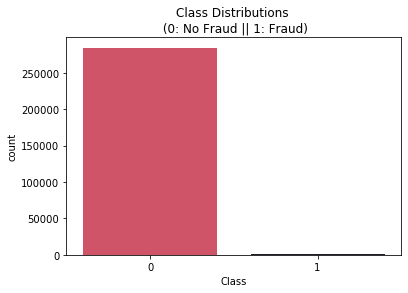

In [7]:
#plot
colors = ["#E43F5A", "#1B1B2F"]

sns.countplot('Class', data=dt, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)')

We observe that the dataset is clearly imbalanced.

## Plot graphs to see behaviour of time and amount

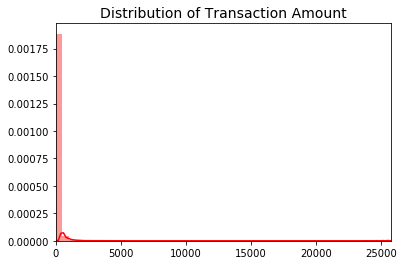

In [8]:

# fig=plt.figure()

amount_val = dt['Amount'].values
time_val = dt['Time'].values

# plt.subplot(2,1,1)
sns.distplot(amount_val, color='r')
plt.title('Distribution of Transaction Amount', fontsize=14)
plt.xlim([min(amount_val), max(amount_val)])


plt.show()



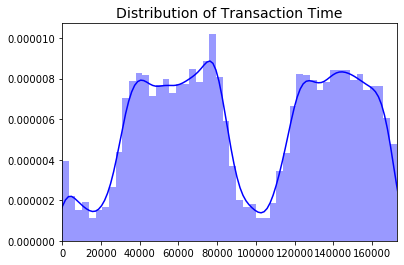

In [9]:

# plt.subplot(2,1,2)
sns.distplot(time_val,color='b')
plt.title('Distribution of Transaction Time', fontsize=14)
plt.xlim([min(time_val), max(time_val)])

plt.show()

This doesn't give any significant insight

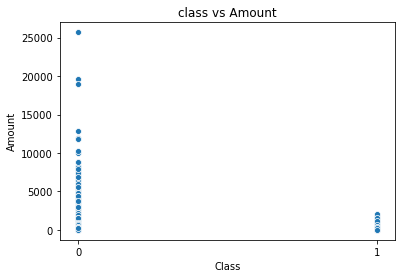

In [10]:
plt.xticks([0,1])
sns.scatterplot(dt['Class'].values, dt['Amount'].values)
plt.title("class vs Amount")
plt.xlabel("Class")
plt.ylabel("Amount")
plt.show()

This graph shaws that the frauds have more variance in terms of amount wrt non-fraud transactions.

## Correlation- Heatmap

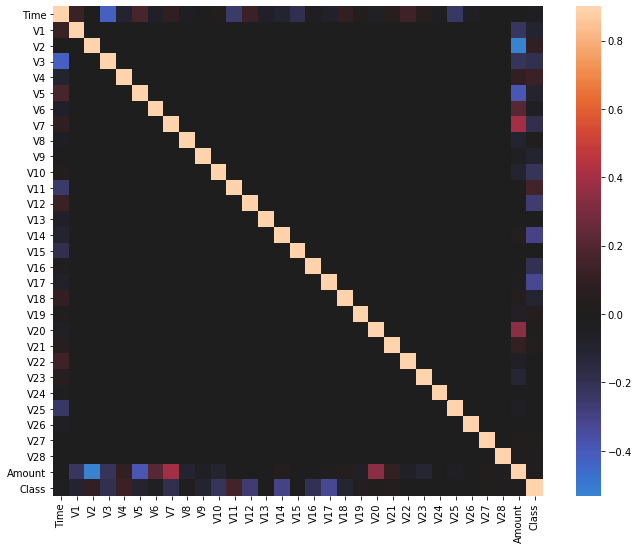

In [11]:
# Compute the correlation matrix
corr = dt.corr()

# Set up the matplotlib figure
fig = plt.figure(figsize = (12, 9)) 

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, vmax=.9, center=0, square=True)

Shows no significant correlation between the features.

# Data preparation

## Drop the time

We drop the time column since it doesn't actually have any relation with the tractions being fraudulent or non fraudulent(They are jut chronological timestamps)


In [12]:
#drop the time column

dt=dt.drop("Time",axis=1)
#can also be done by reassigning dt as dt.iloc(:,2:)
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Convert the Class column into Categories

Categoricals are a pandas data type corresponding to categorical variables in statistics. A categorical variable takes on a limited, and usually fixed, number of possible values (categories; levels in R).

In [13]:
#convering class in categories
dt["Class"] = dt["Class"].astype('category')
dt["Class"] = dt["Class"].cat.rename_categories({0: 'Not_Fraud', 1: 'Fraud'})
dt["Class"]

0         Not_Fraud
1         Not_Fraud
2         Not_Fraud
3         Not_Fraud
4         Not_Fraud
            ...    
284802    Not_Fraud
284803    Not_Fraud
284804    Not_Fraud
284805    Not_Fraud
284806    Not_Fraud
Name: Class, Length: 284807, dtype: category
Categories (2, object): [Not_Fraud, Fraud]

## Scale the data

It is a step of Data Pre Processing which is applied to independent variables or features of data. It helps to normalise the data within a particular range. Sometimes, it also helps in speeding up the calculations in an algorithm.
 MinMaxScaler, RobustScaler, StandardScaler, and Normalizer are scikit-learn methods to preprocess data for machine learning.

RobustScaler transforms the feature vector by subtracting the median and then dividing by the interquartile range (75% value — 25% value).It reduces the effects of outliers, relative.


In [14]:
scaler = RobustScaler().fit(dt.iloc[:,:-1])

scaler.transform(dt.iloc[:,:-1])
dt.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,Not_Fraud
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,Not_Fraud
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,Not_Fraud
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,Not_Fraud
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,Not_Fraud


## Split the data into test and train data

In [15]:
#split
x=dt.iloc[:,:-1]
y=dt.iloc[:,-1]
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 0)


## Check proportion of values in the target class

In [16]:
#check proportion of class

print(yTrain.value_counts())
print(yTest.value_counts())
# proportion
print(yTrain.value_counts(normalize=True))
print(yTest.value_counts(normalize=True))

Not_Fraud    227454
Fraud           391
Name: Class, dtype: int64
Not_Fraud    56861
Fraud          101
Name: Class, dtype: int64
Not_Fraud    0.998284
Fraud        0.001716
Name: Class, dtype: float64
Not_Fraud    0.998227
Fraud        0.001773
Name: Class, dtype: float64


# Dealing with imbalance!

Machine Learning algorithms tend to produce unsatisfactory classifiers when faced with imbalanced datasets. For any imbalanced data set, if the event to be predicted belongs to the minority class and the event rate is less than 5%, it is usually referred to as a rare event. Dealing with imbalanced datasets entails strategies such as improving classification algorithms or balancing classes in the training data (data preprocessing) before providing the data as input to the machine learning algorithm. The later technique is preferred as it has wider application.
The main objective of balancing classes is to either increasing the frequency of the minority class or decreasing the frequency of the majority class. This is done in order to obtain approximately the same number of instances for both the classes. 

Different versions of the training set as per sampling technique
* Undersampling
* Oversampling
* SMOTE
* Near-Miss


# Under- Sampling

Random Undersampling aims to balance class distribution by randomly eliminating majority class examples.  This is done until the majority and minority class instances are balanced out.

In [17]:
rus = RandomUnderSampler(sampling_strategy='auto',random_state=9650)
X_res, y_res = rus.fit_resample(xTrain, yTrain)
# print(X_res.value_counts())
print(y_res.value_counts())
# y_res.head()
print(X_res.shape)
print(y_res.shape)

Fraud        391
Not_Fraud    391
Name: Class, dtype: int64
(782, 29)
(782,)


# Over-Sampling

Over-Sampling increases the number of instances in the minority class by randomly replicating them in order to present a higher representation of the minority class in the sample.

In [18]:
ros = RandomOverSampler(sampling_strategy='auto',random_state=9650)
X_ros, y_ros = ros.fit_resample(xTrain, yTrain)
print(y_ros.value_counts())
print(X_ros.shape)
print(y_ros.shape)

Fraud        227454
Not_Fraud    227454
Name: Class, dtype: int64
(454908, 29)
(454908,)


# SMOTE

**Synthetic Minority Over-sampling TEchnique** for imbalanced data is followed to avoid overfitting which occurs when exact replicas of minority instances are added to the main dataset. A subset of data is taken from the minority class as an example and then new synthetic similar instances are created. These synthetic instances are then added to the original dataset. 

In [19]:
sm = SMOTE(sampling_strategy='auto',random_state=9650)
X_sm, y_sm = sm.fit_resample(xTrain, yTrain)
print(y_sm.value_counts())
print(X_sm.shape)
print(y_sm.shape)

Fraud        227454
Not_Fraud    227454
Name: Class, dtype: int64
(454908, 29)
(454908,)


# Near-miss Algorithm

NearMiss is an under-sampling technique. Instead of resampling the Minority class, using a distance, this will make the majority class equal to minority class.

In [20]:
nr = NearMiss(sampling_strategy='auto')
X_nr, y_nr = nr.fit_resample(xTrain, yTrain)
print(y_nr.value_counts())
print(X_nr.shape)
print(y_nr.shape)

Fraud        391
Not_Fraud    391
Name: Class, dtype: int64
(782, 29)
(782,)


# Modelling

## Check performance of differently sampled data

Before starting first we check how CART performs with imbalanced data. We use the ROC as a parameter to gauge model performance on the test set.

### Common function to plot ROC and find auc, plot roc and classification report

In [21]:
#function to plot ROC
def roc_plot(fpr,tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()
def test_auc_roc_classification_score(clf):
    probs = clf.predict_proba(xTest)
    probs = probs[:, 1]
    auc = roc_auc_score(yTest, probs)
    print('AUC: %.2f' % auc)
    fpr, tpr, thresholds = roc_curve(yTest,probs, pos_label='Not_Fraud')
    roc_plot(fpr,tpr)
    predicted=clf.predict(xTest)
    report = classification_report(yTest, predicted)
    print(report)

## CART - Decision Trees Classification

### On original Training set 

AUC: 0.88


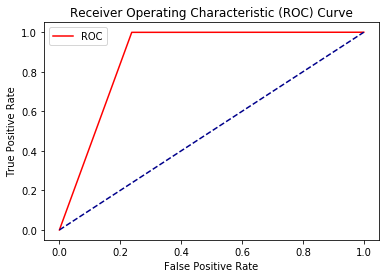

              precision    recall  f1-score   support

       Fraud       0.73      0.76      0.75       101
   Not_Fraud       1.00      1.00      1.00     56861

    accuracy                           1.00     56962
   macro avg       0.87      0.88      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
clf = tree.DecisionTreeClassifier()
#for original training dataset
clf = clf.fit(xTrain, yTrain)

test_auc_roc_classification_score(clf)

We evaluate the model performance on test data by finding the roc auc score
We will now apply various sampling techniques to the data and see the performance on the test set.


### On under-sampled data

AUC: 0.92


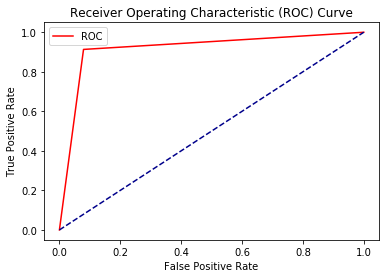

              precision    recall  f1-score   support

       Fraud       0.02      0.92      0.04       101
   Not_Fraud       1.00      0.91      0.95     56861

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.50     56962
weighted avg       1.00      0.91      0.95     56962



In [23]:
clf_under = tree.DecisionTreeClassifier()
clf_under = clf_under.fit(X_res, y_res)
test_auc_roc_classification_score(clf_under)

### On over-sampled data

AUC: 0.92


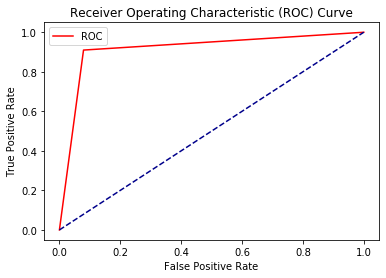

              precision    recall  f1-score   support

       Fraud       0.02      0.92      0.03       101
   Not_Fraud       1.00      0.91      0.95     56861

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [24]:
clf_o = tree.DecisionTreeClassifier()
clf_o = clf.fit(X_res, y_res)
test_auc_roc_classification_score(clf_o)

### On SMOTE

AUC: 0.90


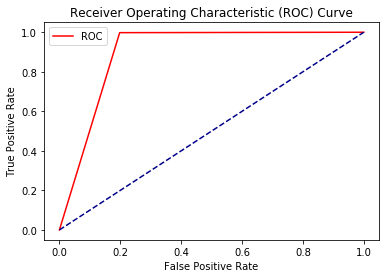

              precision    recall  f1-score   support

       Fraud       0.41      0.80      0.54       101
   Not_Fraud       1.00      1.00      1.00     56861

    accuracy                           1.00     56962
   macro avg       0.70      0.90      0.77     56962
weighted avg       1.00      1.00      1.00     56962



In [25]:
clf_sm = tree.DecisionTreeClassifier()
clf_sm = clf.fit(X_sm, y_sm)
test_auc_roc_classification_score(clf_sm)

### On NearMiss dataset

AUC: 0.51


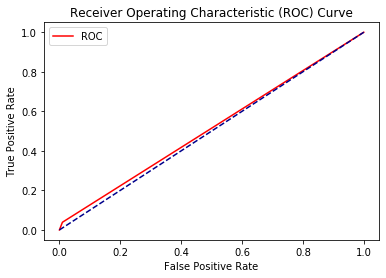

              precision    recall  f1-score   support

       Fraud       0.00      0.99      0.00       101
   Not_Fraud       1.00      0.04      0.07     56861

    accuracy                           0.04     56962
   macro avg       0.50      0.51      0.04     56962
weighted avg       1.00      0.04      0.07     56962



In [26]:
clf_nr = tree.DecisionTreeClassifier()
clf_nr = clf.fit(X_nr, y_nr)
test_auc_roc_classification_score(clf_nr)

#### Since over-sampled shows best results, we choose it to further test other models

# Testing different models

## Logistic Regression

AUC: 0.99


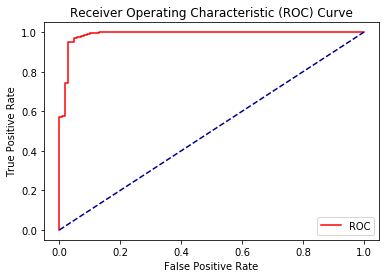

              precision    recall  f1-score   support

       Fraud       0.07      0.93      0.12       101
   Not_Fraud       1.00      0.98      0.99     56861

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [27]:
reg = LogisticRegression(random_state=0, solver='lbfgs', max_iter=1000, multi_class='ovr').fit(X_ros, y_ros)
test_auc_roc_classification_score(reg)

## KNN

AUC: 0.89


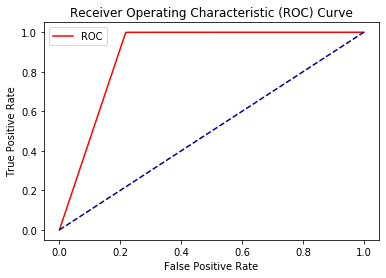

              precision    recall  f1-score   support

       Fraud       0.71      0.77      0.74       101
   Not_Fraud       1.00      1.00      1.00     56861

    accuracy                           1.00     56962
   macro avg       0.85      0.89      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [28]:
knn_clf = KNeighborsClassifier().fit(X_ros, y_ros)
test_auc_roc_classification_score(knn_clf)

## Random Forest

AUC: 0.95


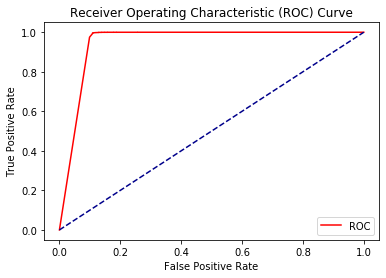

              precision    recall  f1-score   support

       Fraud       0.93      0.81      0.87       101
   Not_Fraud       1.00      1.00      1.00     56861

    accuracy                           1.00     56962
   macro avg       0.97      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [29]:
rf_clf = RandomForestClassifier().fit(X_ros, y_ros)
test_auc_roc_classification_score(rf_clf)

## XGBoost

AUC: 0.98


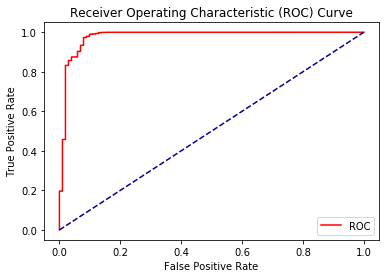

              precision    recall  f1-score   support

       Fraud       0.13      0.90      0.22       101
   Not_Fraud       1.00      0.99      0.99     56861

    accuracy                           0.99     56962
   macro avg       0.56      0.95      0.61     56962
weighted avg       1.00      0.99      0.99     56962



In [30]:
xgb_clf = xgb.XGBClassifier(max_depth=3, n_estimator=300, learning_rate=0.05).fit(X_ros, y_ros)
test_auc_roc_classification_score(xgb_clf)

## We conclude that XGBoost performs the best!

Precision is a good measure to determine, when the costs of False Positive is high.

Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.

In fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.